# Import dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense, Flatten, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import pickle
import time
import os

# Set training environment variables

In [2]:
# images properties
WIDTH = 96
HEIGHT = 96
CHANELS = 3
IMAGE_SHAPE = (HEIGHT, WIDTH, CHANELS)

# training set properties
BUFFER_SIZE = 160 # len of training set
BATCH_SIZE = 8
SEED_SIZE = 100

# image printing properties
ROWS = 5
COLS = 5

# training properties
START_EPOCH = 0
NUM_EPOCHS = 1500

# Read one image

In [3]:
image_path = os.path.join(os.getcwd(),'Bary_65.png')
image_path

'C:\\Users\\48509\\Desktop\\Ja2- generating faces\\Bary_65.png'

In [4]:
# copy the same image n time
images=[Image.open(image_path).convert("RGB") for _ in range(160)]
len(images)

160

In [5]:
# look on the size of images
images[0].size

(48, 43)

# Crop images to size (96 x 96)

In [6]:
images = [img.resize( (HEIGHT, WIDTH),Image.ANTIALIAS) for img in images]
# look on the size of resized images
images[0].size

(96, 96)

# Show orginal image

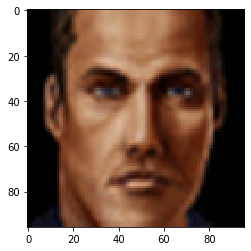

In [7]:
plt.imshow(images[0])

# Convert images to arrays

In [8]:
images = np.array([np.asarray(img) for img in images], dtype='float32')
images[0].shape

(96, 96, 3)

# Image Augumentation

In [9]:
# create appropriate sample dimms
sample = np.expand_dims(images[0], 0)
sample.shape

(1, 96, 96, 3)

In [10]:
def print_augumented_image(image, rows, cols, it):
    
    ''' Generated images'''
    plt.figure(figsize=(rows, cols))
    gs1 = gs.GridSpec(rows, cols)
    gs1.update(wspace=0, hspace=0)

    for i in range(rows*cols):
        ax1 = plt.subplot(gs1[i])
        ax1.set_aspect('equal')
        # create augumented image
        batch=it.next()
        augumented_image=batch[0].astype('uint8')
        fig = plt.imshow(augumented_image)
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        
    plt.tight_layout()
    
    plt.show()

## Horizontal flip

In [14]:
# prepare iterator
it = datagen.flow(images[:32], batch_size=1)

it.next().shape

(1, 96, 96, 3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

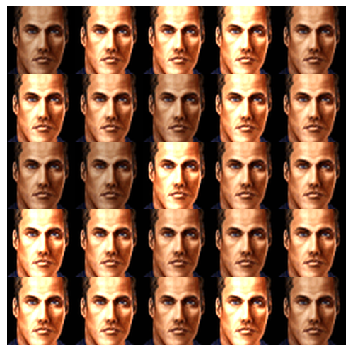

In [16]:
print_augumented_image(sample, ROWS, COLS, it)

## Brightness

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.8, 1.8])
# prepare iterator
it = datagen.flow(sample, batch_size=1)

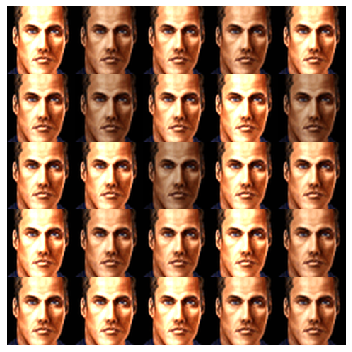

In [18]:
print_augumented_image(sample, ROWS, COLS, it)

## Zoom range

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[1.3, 1.4],
                            fill_mode='constant',
                            cval=1)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

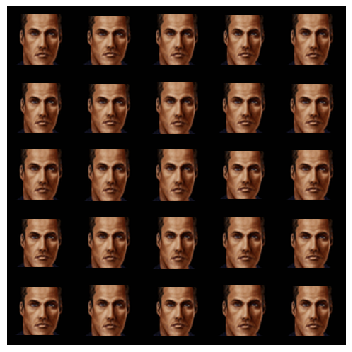

In [67]:
print_augumented_image(sample, ROWS, COLS, it)

## Height and width shift range

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.05,
                            width_shift_range=0.1)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

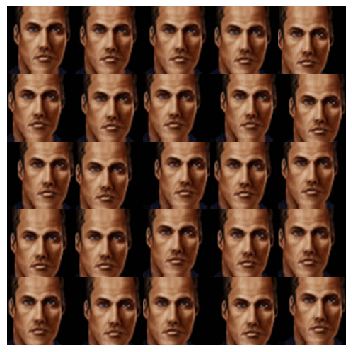

In [22]:
print_augumented_image(sample, ROWS, COLS, it)

## Rotation range

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=5)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

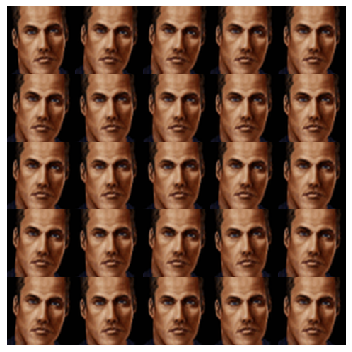

In [118]:
print_augumented_image(sample, ROWS, COLS, it)

## Shear range

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(shear_range=5)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

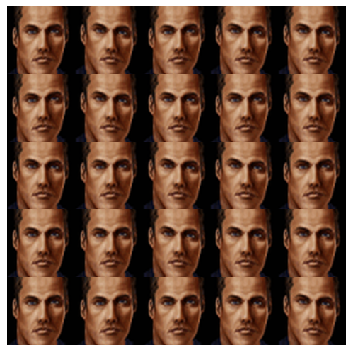

In [136]:
print_augumented_image(sample, ROWS, COLS, it)

## Channel_shift_range ?

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(channel_shift_range=20)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

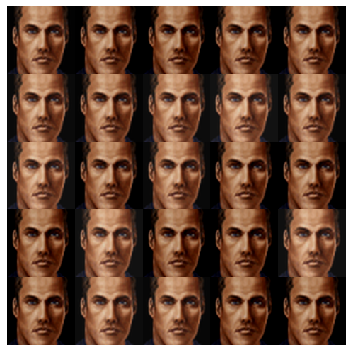

In [160]:
print_augumented_image(sample, ROWS, COLS, it)

## All together

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True,
                             brightness_range=[0.8, 1.8],
                             height_shift_range=0.05,
                             width_shift_range=0.1,
#                              rotation_range=3,
#                              shear_range=2,
                             channel_shift_range=10,
                             zoom_range=[1., 1.2],
                             fill_mode='constant',
                             cval=1)
# prepare iterator
it = datagen.flow(sample, batch_size=1)

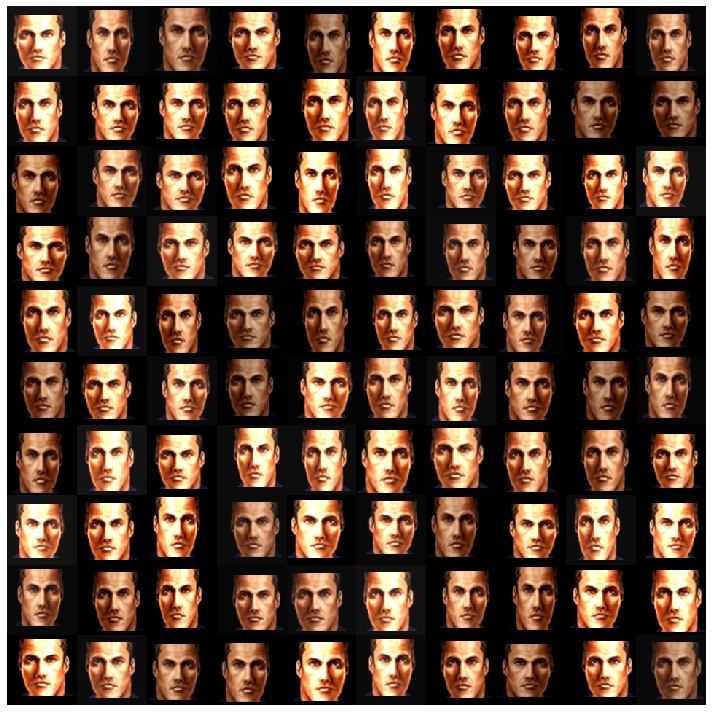

In [63]:
print_augumented_image(sample, 10, 10, it)

# Normalize the images to the range(-1,1)

In [78]:
def norm(images):
    return ( (images-127.5)/127.5 ).astype('float32')

def denorm(images):
    return (images*127.5+127.5).astype('int')

# Test Normalization

In [85]:
# normalize the images
images1=norm(images)
print(images1[0])


print('-'*50)

# denorm the images
images1=denorm(images1)

print(images1[0])

[[[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 ...

 [[-0.9843137  -0.9764706  -0.9764706 ]
  [-0.96862745 -0.96862745 -0.94509804]
  [-0.94509804 -0.94509804 -0.8980392 ]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [

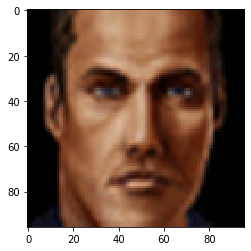

In [81]:
plt.imshow(images1[0])

In [82]:
def norm2(images):
    return ( images / 127.5 - 1 ).astype('float32')

def denorm2(images):
    return ( (0.5 * images + 0.5) * 255 ).astype('int')

In [86]:
# normalize the images
images2=norm2(images)
print(images2[0])

print('-'*50)

# denorm the images
images2=denorm2(images2)
print(images2[0])

[[[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 ...

 [[-0.9843137  -0.9764706  -0.9764706 ]
  [-0.96862745 -0.96862745 -0.94509804]
  [-0.94509804 -0.94509804 -0.8980392 ]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [

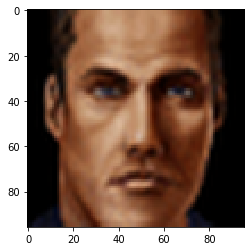

In [84]:
plt.imshow(images2[0])

# Test which normalization is better

In [88]:
from sklearn.metrics import mean_absolute_error

print(f'Normalization 1: {mean_absolute_error(images.flatten(), images1.flatten())}')
print(f'Normalization 2: {mean_absolute_error(images.flatten(), images2.flatten())}')

Normalization 1: 0.0
Normalization 2: 0.5246310763888888
